## Ames Housing price prediction
Kaggle competetion in 2015, the data has 79 explanatory variables describing aspects of homes in Ames, Iowa, the aim is to predict the final price of each home.

Solution
Linear Regression model: Ridge L2, Lasso L1

In [1]:
#import necessary tools
import numpy as np  #matrix
import pandas as pd  #SQL data solving 

from scipy.stats import skew #check the data whether symmetric
from sklearn.metrics import r2_score  #measure the model

import matplotlib.pyplot as plt 
import seaborn as sns

from IPython.display import display

%matplotlib inline

### 1. Read the data
the same method of data preprocess for train and test

In [2]:
# path to where the data lies
train = pd.read_csv("/Users/hankaei/AIData/Ames_House_train.csv")
test = pd.read_csv("/Users/hankaei/AIData/Ames_House_test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 81)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

### 2. Data discovery

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#for categorical feature, observe the scope of data and histogram
categorical_features = train.select_dtypes(include = ["object"]).columns
for col in categorical_features:
    print ('\n%s different data range and times of occurency'%col)
    print (train[col].value_counts())


MSZoning different data range and times of occurency
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street different data range and times of occurency
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley different data range and times of occurency
Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape different data range and times of occurency
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour different data range and times of occurency
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities different data range and times of occurency
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig different data range and times of occurency
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope different data range and times of occurency
Gtl    1382
Mod      65
Sev      1

### 3. Feature Engineering

In [8]:
# delete 'Id'
train.drop(['Id'], inplace = True, axis = 1)
test_id = test['Id']
test.drop(['Id'], inplace = True, axis = 1)

#### 3.1 observe the outliers

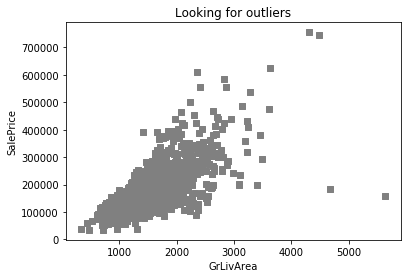

In [9]:
# show outliers in plot
plt.scatter(train.GrLivArea, train.SalePrice, c = "gray", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

#remove the outliers which are over 4000, and re-index the data 
train = train[train.GrLivArea < 4000] 
temp = train.reindex()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
LotFrontage      1197 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            91 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 non-

#### 3.2 Solving the missing value

In [11]:
#define the function for both train and test
def process_missvalue_by_meaning (df):
    # Alley : data description says NA means "no alley access"
    df.loc[:, "Alley"] = df.loc[:, "Alley"].fillna("None")

    # BedroomAbvGr : NA most likely means 0
    df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)

    # BsmtQual etc : data description says NA for basement features is "no basement"
    df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
    df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
    df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
    df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
    df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
    df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
    df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
    df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)

    # CentralAir : NA most likely means No
    df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")

    # Condition : NA most likely means Normal, near to main road or rail
    df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
    df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")

    # EnclosedPorch : NA most likely means no enclosed porch
    df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)

    # External stuff : NA most likely means average
    df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
    df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")

    # Fence : data description says NA means "no fence"
    df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")

    # FireplaceQu : data description says NA means "no fireplace"
    df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
    df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)

    # Functional : data description says NA means typical
    df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")

    # GarageType etc : data description says NA for garage features is "no garage"
    df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
    df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
    df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
    df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
    df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
    df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)

    # HalfBath : NA most likely means no half baths above grade
    df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)

    # HeatingQC : NA most likely means typical
    df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")

    # KitchenAbvGr : NA most likely means 0
    df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)

    # KitchenQual : NA most likely means typical
    df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")

    # LotFrontage : NA most likely means no lot frontage
    df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)

    # LotShape : NA most likely means regular
    df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")

    # MasVnrType : NA most likely means no veneer
    df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
    df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)

    # MiscFeature : data description says NA means "no misc feature"
    df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
    df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)

    # OpenPorchSF : NA most likely means no open porch
    df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)

    # PavedDrive : NA most likely means not paved
    df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")

    # PoolQC : data description says NA means "no pool"
    df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
    df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)

    # SaleCondition : NA most likely means normal sale
    df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")

    # ScreenPorch : NA most likely means no screen porch
    df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)

    # TotRmsAbvGrd : NA most likely means 0
    df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)

    # Utilities : NA most likely means all public utilities
    df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")

    # WoodDeckSF : NA most likely means no wood deck
    df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)
    
    return df
    
train = process_missvalue_by_meaning(train)
test = process_missvalue_by_meaning(test)

In [12]:
# Some numerical features are actually really categories
# MSSubClass：buildings
# MoSold：sold by month

def numberical2cat(df):
    df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                            7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      }, inplace = True)

    return df
train = numberical2cat(train)
test = numberical2cat(test)

In [13]:
# Encode some categorical features as ordered numbers when there is information in the order
def cat2numberical(df):
    df.replace({"Alley" : {"None":0, "Grvl" : 1, "Pave" : 2},
                "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                "Street" : {"Grvl" : 1, "Pave" : 2},
                "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}},
                       inplace = True
                     )
    return df

train = cat2numberical(train)
test = cat2numberical(test)

In [14]:
# Create new features
# 1* Simplifications of existing features
def simplify(df):
    df["SimplOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                    4 : 2, 5 : 2, 6 : 2, # average
                                                    7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                    }, inplace = True)
    df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                    4 : 2, 5 : 2, 6 : 2, # average
                                                    7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                    },inplace = True)
    df["SimplPoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1, # average
                                           3 : 2, 4 : 2 # good
                                          },inplace = True)
    df["SimplGarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                                2 : 1, 3 : 1, # average
                                                4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplGarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                                    2 : 1, 3 : 1, # average
                                                    4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                    2 : 1, 3 : 1, # average
                                                    4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                    2 : 1, 3 : 1, # average
                                                    4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplFunctional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                                3 : 2, 4 : 2, # major
                                                5 : 3, 6 : 3, 7 : 3, # minor
                                                8 : 4 # typical
                                                        },inplace = True)
    df["SimplKitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                    2 : 1, 3 : 1, # average
                                                    4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplHeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                2 : 1, 3 : 1, # average
                                                4 : 2, 5 : 2 # good
                                                      },inplace = True)
    df["SimplBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                    2 : 1, 3 : 1, # rec room
                                                    4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            },inplace = True)
    df["SimplBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                    2 : 1, 3 : 1, # rec room
                                                    4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            },inplace = True)
    df["SimplBsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                            2 : 1, 3 : 1, # average
                                            4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplBsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                            2 : 1, 3 : 1, # average
                                            4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                2 : 1, 3 : 1, # average
                                                4 : 2, 5 : 2 # good
                                                      },inplace = True)
    df["SimplExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                2 : 1, 3 : 1, # average
                                                4 : 2, 5 : 2 # good
                                                      },inplace = True)
    return df

train = simplify(train)
test = simplify(test)

In [15]:
# 2* Combinations of existing features
def Combine(df):
    # Overall quality of the house
    df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]
    # Overall quality of the garage
    df["GarageGrade"] = df["GarageQual"] * df["GarageCond"]
    # Overall quality of the exterior
    df["ExterGrade"] = df["ExterQual"] * df["ExterCond"]
    # Overall kitchen score
    df["KitchenScore"] = df["KitchenAbvGr"] * df["KitchenQual"]
    # Overall fireplace score
    df["FireplaceScore"] = df["Fireplaces"] * df["FireplaceQu"]
    # Overall garage score
    df["GarageScore"] = df["GarageArea"] * df["GarageQual"]
    # Overall pool score
    df["PoolScore"] = df["PoolArea"] * df["PoolQC"]
    # Simplified overall quality of the house
    df["SimplOverallGrade"] = df["SimplOverallQual"] * df["SimplOverallCond"]
    # Simplified overall quality of the exterior
    df["SimplExterGrade"] = df["SimplExterQual"] * df["SimplExterCond"]
    # Simplified overall pool score
    df["SimplPoolScore"] = df["PoolArea"] * df["SimplPoolQC"]
    # Simplified overall garage score
    df["SimplGarageScore"] = df["GarageArea"] * df["SimplGarageQual"]
    # Simplified overall fireplace score
    df["SimplFireplaceScore"] = df["Fireplaces"] * df["SimplFireplaceQu"]
    # Simplified overall kitchen score
    df["SimplKitchenScore"] = df["KitchenAbvGr"] * df["SimplKitchenQual"]
    # Total number of bathrooms
    df["TotalBath"] = df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]) + \
    df["FullBath"] + (0.5 * df["HalfBath"])
    # Total SF for house (incl. basement)
    df["AllSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
    # Total SF for 1st + 2nd floors
    df["AllFlrsSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
    # Total SF for porch
    df["AllPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + \
    df["3SsnPorch"] + df["ScreenPorch"]
    # Has masonry veneer or not
    df["HasMasVnr"] = df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                            "Stone" : 1, "None" : 0})
    # House completed before sale or not
    df["BoughtOffPlan"] = df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                    "Family" : 0, "Normal" : 0, "Partial" : 1})
    
    return df

#对训练集和测试集分别进行编码
train = Combine(train)
test = Combine(test)

In [16]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
#print(corr.SalePrice)

threshold = corr.SalePrice.iloc[11]  #the first one is SalePrice itself,from 1-11
print (threshold)
top10_cols = (corr.SalePrice[corr['SalePrice']>threshold]).axes

Find most important features relative to target
0.616027698277


In [17]:
# Create new features
# 3* Polynomials on the top 10 existing features
def Polynomials_top10(df, top10_cols):
    for i in range(1,11):
        new_cols_2 = top10_cols[0][i] + '_s' + str(2)
        new_cols_3 = top10_cols[0][i] + '_s' + str(3)
        new_cols_sq = top10_cols[0][i] + '_sq'
        
        df[new_cols_2] = df[top10_cols[0][i]] ** 2
        df[new_cols_3] = df[top10_cols[0][i]] ** 3
        df[new_cols_sq] = np.sqrt(df[top10_cols[0][i]]) 
        
    return df


train = Polynomials_top10(train, top10_cols)
test = Polynomials_top10(test,top10_cols)

In [18]:
from sklearn.preprocessing import StandardScaler
def fillna_numerical_train(df):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    
    numerical_features = numerical_features.drop("SalePrice")
    print("Numerical features : " + str(len(numerical_features)))

    df.info()
    df_num = df[numerical_features]
    #df_num.info()
    
    medians = df_num.median() 
    # Handle remaining missing values for numerical features by using median as replacement
    print("NAs for numerical features in df : " + str(df_num.isnull().values.sum()))
    df_num = df_num.fillna(medians)
    print("Remaining NAs for numerical features in df : " + str(df_num.isnull().values.sum()))

    #df_num.info()
    ss_X = StandardScaler()

    #fit the model
    temp = ss_X.fit_transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index =df_num.index)
    
    return df_num, medians, ss_X

train_num, medians, ss_X = fillna_numerical_train(train)

Numerical features : 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 144 entries, MSSubClass to 1stFlrSF_sq
dtypes: float64(16), int64(82), object(46)
memory usage: 1.6+ MB
NAs for numerical features in df : 81
Remaining NAs for numerical features in df : 0


In [19]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 97 columns):
LotFrontage       1456 non-null float64
LotArea           1456 non-null float64
Street            1456 non-null float64
Alley             1456 non-null float64
LotShape          1456 non-null float64
Utilities         1456 non-null float64
LandSlope         1456 non-null float64
OverallQual       1456 non-null float64
OverallCond       1456 non-null float64
YearBuilt         1456 non-null float64
YearRemodAdd      1456 non-null float64
MasVnrArea        1456 non-null float64
ExterQual         1456 non-null float64
ExterCond         1456 non-null float64
BsmtQual          1456 non-null float64
BsmtCond          1456 non-null float64
BsmtExposure      1456 non-null float64
BsmtFinType1      1456 non-null float64
BsmtFinSF1        1456 non-null float64
BsmtFinType2      1456 non-null float64
BsmtFinSF2        1456 non-null float64
BsmtUnfSF         1456 non-null float64
TotalBsmtSF  

In [20]:
#fill other NA by median value in test
def fillna_numerical_test(df, medians, ss_X):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    #numerical_features = numerical_features.drop("SalePrice")  
    print("Numerical features : " + str(len(numerical_features)))

    df_num = df[numerical_features]
    
    # Handle remaining missing values for numerical features by using median as replacement
    print("NAs for numerical features in df : " + str(df_num.isnull().values.sum()))
    df_num = df_num.fillna(medians)
    print("Remaining NAs for numerical features in df : " + str(df_num.isnull().values.sum()))

    temp = ss_X.transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index =df_num.index )
    return df_num

test_num = fillna_numerical_test(test, medians, ss_X)

Numerical features : 97
NAs for numerical features in df : 88
Remaining NAs for numerical features in df : 0


In [21]:
def get_dummies_cat(df):
    categorical_features = df.select_dtypes(include = ["object"]).columns
    print("Categorical features : " + str(len(categorical_features)))
    df_cat = df[categorical_features]
    

    # Create dummy features for categorical values via one-hot encoding
    print("NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
    df_cat = pd.get_dummies(df_cat,dummy_na=True)
    print("Remaining NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
    
    return df_cat

n_train_samples = train.shape[0]  
train_test = pd.concat((train, test), axis=0)
train_test_cat = get_dummies_cat(train_test)
   
train_cat = train_test_cat.iloc[:n_train_samples, :]
test_cat = train_test_cat.iloc[n_train_samples:, :]

Categorical features : 46
NAs for categorical features in df : 61223
Remaining NAs for categorical features in df : 0


In [22]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 246 entries, BldgType_1Fam to SimplPoolScore_nan
dtypes: uint8(246)
memory usage: 361.2 KB


In [23]:
# Join categorical and numerical features
def joint_num_cat(df_num, df_cat):
    df = pd.concat([df_num, df_cat], axis = 1, ignore_index=True)
    print("New number of features : " + str(df.shape[1]))
    
    return df

FE_train = joint_num_cat(train_num, train_cat)
FE_test = joint_num_cat(test_num, test_cat)

FE_train = pd.concat([FE_train, train['SalePrice']], axis = 1)
FE_test = pd.concat([test_id,FE_test], axis = 1)
#save file
#FE_train.to_csv('AmesHouse_FE_train.csv', index=False)
#FE_test.to_csv('AmesHouse_FE_test.csv', index=False)

New number of features : 343
New number of features : 343


In [24]:
FE_train.head()

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,SalePrice
0,0.227483,-0.202770,0.064327,-0.243378,0.700717,0.026216,0.226042,1.253123,-0.419233,1.053769,...,1,1,1,1,1,1,1,1,1,208500
1,0.670403,-0.086107,0.064327,-0.243378,0.700717,0.026216,0.226042,-0.694099,1.858393,0.159469,...,1,1,1,1,1,1,1,1,1,181500
2,0.316067,0.081281,0.064327,-0.243378,-1.028509,0.026216,0.226042,1.253123,-0.419233,0.987524,...,1,1,1,1,1,1,1,1,1,223500
3,0.079843,-0.091179,0.064327,-0.243378,-1.028509,0.026216,0.226042,1.253123,-0.419233,-1.860986,...,1,1,1,1,1,1,1,1,1,140000
4,0.788515,0.386636,0.064327,-0.243378,-1.028509,0.026216,0.226042,1.253123,-0.419233,0.954402,...,1,1,1,1,1,1,1,1,1,250000


In [25]:
FE_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 344 entries, 0 to SalePrice
dtypes: float64(97), int64(1), uint8(246)
memory usage: 1.4 MB


In [26]:
FE_train.shape

(1456, 344)

### 4. decide the model
#### 4.1 prepare for data

In [27]:
# define X and y
y = FE_train['SalePrice'].values
X = FE_train.drop('SalePrice', axis = 1)

from sklearn.cross_validation import train_test_split

#cut the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33, test_size = 0.25)

/Users/hankaei/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### 4.2 try the linear model

In [28]:
from sklearn.linear_model import LinearRegression

# default model
linear = LinearRegression()

# fit model
linear.fit(X_train, y_train)

# predict model with score
linear_y_predict = linear.predict(X_test)
linear_y_predict_train = linear.predict(X_train)

# show parameter w
linear.coef_

array([  1.04452662e+03,   5.03926979e+03,   2.13809614e+03,
        -1.61433988e+01,   3.87283327e+02,  -4.52764652e-08,
         1.09704167e+03,  -1.72587775e+03,  -2.30840816e+03,
         1.69374479e+04,   1.64859003e+03,   2.55692584e+03,
        -4.96319528e+02,  -3.18286351e+03,  -2.17437320e+02,
         2.16009974e+02,   5.31179822e+03,   8.21862269e+02,
        -5.51276592e+03,  -2.21358857e+02,  -4.39326253e+03,
        -1.29655983e+04,  -2.13871998e+04,   1.15089634e+03,
        -2.23380098e+05,   1.82014560e+05,   1.87974177e+05,
         1.04684653e+04,  -5.90799483e+04,  -1.35536988e+04,
        -6.22142623e+04,  -2.68054266e+04,  -2.96457604e+03,
        -5.28390532e+03,  -8.20919074e+03,   3.43296369e+03,
         3.82968327e+03,   9.88885364e+02,  -1.27060618e+01,
         2.96382009e+02,   6.72417555e+04,  -6.23815500e+05,
        -2.10809914e+03,   1.16294021e+04,  -3.88868494e+02,
         2.22829170e+03,   1.32593036e+03,  -4.99876353e+02,
         1.17477922e+03,

In [29]:
#evaluate model with r2_score
print ('The value of default measurement of LinearRegression on test is', linear.score(X_test, y_test))
print ('The value of default measurement of LinearRegression on train is', linear.score(X_train, y_train))

The value of default measurement of LinearRegression on test is 0.893741978337
The value of default measurement of LinearRegression on train is 0.94048780479


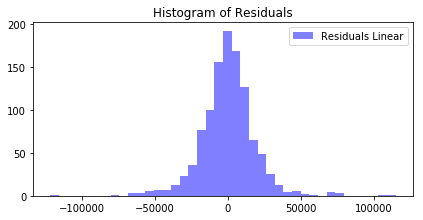

In [30]:
# check residual on train，whether fit the hypothesis: gussian noise
f, ax = plt.subplots(figsize = (6, 3))
f.tight_layout()
ax.hist(y_train - linear_y_predict_train, bins = 40, label = 'Residuals Linear', color = 'b', alpha = .5);
ax.set_title("Histogram of Residuals")
ax.legend(loc = 'best');

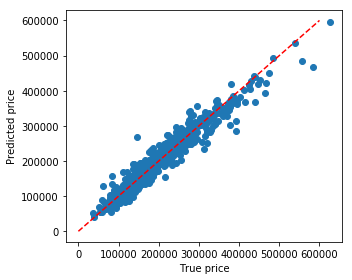

In [31]:
# show scatter plot of true value and predict value
plt.figure(figsize = (5,4))
plt.scatter(y_train, linear_y_predict_train)
plt.plot([0, 600000], [0, 600000], '--r')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

#### 4.3 Ridge --> L2

In [32]:
from sklearn.linear_model import RidgeCV

# alphas set to different value
alphas = [0.01, 0.1, 1, 10, 13, 15, 17, 17.827, 19, 20, 40, 100, 1000]
reg = RidgeCV(alphas=alphas, store_cv_values = True)
reg.fit(X_train, y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 13, 15, 17, 17.827, 19, 20, 40, 100, 1000],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

17.827 is the best alpha

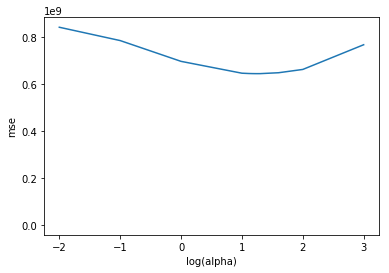

alpha is:


array([  1785.17576639,   4939.64490611,   1588.44316454,   -386.97252867,
         -235.48990264,      0.        ,   1528.46284223,    290.8809914 ,
         2075.01530284,  12507.38525002,   1622.68832329,   4530.75253401,
         -259.63845699,  -3646.25894063,    197.85107351,   -132.28235151,
         5377.25122561,    537.75614729,   4466.14648968,    -72.24658536,
         -534.97076025,  -2999.62276523,   1234.35776464,   1023.73705923,
         3389.41105128,  -2582.33612558,   -455.44138333,    231.89036437,
         -555.91112108,   -608.61357999,   -153.03216116,   2402.34122657,
        -4146.68470326,  -3704.62315022,   -331.36838197,   2929.14493292,
         4271.13961029,   1083.84075178,    973.99031138,   -721.95140517,
         -923.12854879,  -3187.96469698,   4681.85591479,   1146.01918738,
         -260.34580824,   2221.05972932,   1760.30603118,   -711.64123593,
          588.90159168,   2064.33097377,   -924.1690866 ,  -6543.64243869,
        -1647.41581197,  

In [35]:
mse_mean = np.mean(reg.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas), 1))
plt.plot(np.log10(reg.alpha_)*np.ones(3), [0.28, 0.29, 0.30])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:'), reg.alpha_
reg.coef_

In [37]:
# show scores
print ('The value of default measurement of RidgeRegression on test is', reg.score(X_test, y_test))
print ('The value of default measurement of RidgeRegression on train is', reg.score(X_train, y_train))

The value of default measurement of RidgeRegression on test is 0.905400726586
The value of default measurement of RidgeRegression on train is 0.925500435027


#### 4.4 Lasso --> L1

In [38]:
from sklearn.linear_model import LassoCV

alphas = [0.01, 0.1, 1, 10, 100, 160, 200, 1000]

lasso = LassoCV(alphas = alphas)
lasso.fit(X_train, y_train)

/Users/hankaei/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hankaei/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=[0.01, 0.1, 1, 10, 100, 160, 200, 1000], copy_X=True, cv=None,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

the best alpha is 160 with a lot tests

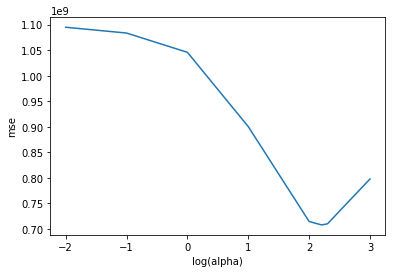

alpha is: 160.0


array([  1783.74775529,   4641.01738599,   1144.05059999,     -0.        ,
         -172.20109826,      0.        ,   1014.33193496,      0.        ,
          271.64492376,  12964.28282345,   1224.85211852,   4194.71516897,
            0.        ,  -3152.81865444,     -0.        ,   -364.0271979 ,
         5261.29932392,      0.        ,   6938.18949042,     -0.        ,
            0.        ,   -381.79231872,      0.        ,    814.00874178,
         1288.55981853,      0.        ,     -0.        ,      0.        ,
           -0.        ,   -396.2305979 ,      0.        ,   2463.02008947,
        -4010.62492407,  -2436.29898263,   1545.27337923,   3117.86651962,
         4416.0876231 ,    787.04827514,   1769.91112647,     -0.        ,
           -0.        ,     -0.        ,   2423.11688009,   -187.44911681,
         -264.95944286,   2227.57526309,   2666.74014373,     -0.        ,
          566.35833077,   2791.00953385,     -0.        ,  -1826.26663647,
        -1624.02264892,  

In [39]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses)
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', lasso.alpha_)
lasso.coef_

In [40]:
#get scores
print ('The value of default measurement of Lasso Regression on test is', lasso.score(X_test, y_test))
print ('The value of default measurement of Lasso Regression on train is', lasso.score(X_train, y_train))

The value of default measurement of Lasso Regression on test is 0.904272171974
The value of default measurement of Lasso Regression on train is 0.919201390295
